<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Introducción a librerías comunes de *Machine Learning*:
    * Pandas
    * Numpy
    * Sklearn
    * Matplotlib
    * Otro..
* Implementación de Perceptrón y variantes.
* Implementación de método aprendizaje online (Gradiente descendente).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 6 de Septiembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Perceptrón a mano

<hr style="height:2px;border:none"/>

<a id="primero"></a>
## 1. Perceptrón a mano

<img src="https://miro.medium.com/max/1838/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="40%"  />

En esta sección se le pedirá que implemente el algoritmo online del *perceptrón* [[2]](#refs) para aprender una función de separación lineal en un problema de clasificación binaria (0 o 1) a través de la función de *treshold*. Un algoritmo online, como el caso del *perceptrón*, aprende de una instancia de dato a la vez $(x^{(i)},y^{(i)})$, dentro de un conjunto de datos $\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), \ldots, (x^{(N)},y^{(N)})  \}$, donde la predicción de la clase para cada instancia es través de la función de *treshold*:

$$
\hat{y_i} = f(x^{(i)};w,b) = \left\{ \begin{array}{lc}
       1 &  si \ \sum_j w_j \cdot x^{(i)}_j +b \geq \theta \\
       0 &  si \ \sum_j w_j \cdot x^{(i)}_j +b < \theta
     \end{array} \right.
$$


Donde $\theta = 0$. Recordar que el *bias* $b$ se puede incluir dentro de los pesos/parámetros $w$ si se agrega una columna extra de 1's a los datos de entrada $x$ (*como se ve en la imagen anterior*). 

Para lo que sigue de la actividad sólo podrá utilizar *numpy* (para operaciones de algebra lineal).

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from csv import reader
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

> a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.

In [229]:
#Ref[5]
def predict(row, weights):
    activation = 0
    for i in range(len(row)):
        activation += weights[i] * row[i] #activation será un valor mayor a cero o (menor o igual) a cero.
    return 1.0 if activation >= 0.0 else 0.0 #se retorna 1 o 0.

Incluye el bias en weights.

> b) Escriba una función que implemente el clásico algoritmo del **Perceptrón** para un problema binario que permita entrenarlo en un conjunto de datos de tamaño $N$, leídos de manera *online* (uno a uno). *Recordar la decisión anterior sobre los bias*.


In [230]:
#Ref[5]
def perceptron(datos, output, l_rate, n_pasada):
    weights = [0.0 for i in range(len(datos[0]))]
    for pasada in range(n_pasada):
        sum_error = 0.0
        cont = 0
        for row in datos:
            prediction = predict(row, weights)
            error = output[cont] - prediction #se ve si coinciden o no. 
            cont += 1
            sum_error += error**2 #sum_error aumentará solamente cuando output[cont] y prediction no coincidan
            for i in range(len(row)):
                #funcion del perceptron que entrena a los datos
                weights[i] = weights[i] + l_rate*error*row[i] #solo cambia si output[cont] y prediction no coinciden
        print('>error=%.3f' % (sum_error))
    return list([weights, sum_error])

 > c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.
> <div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>

``` python
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train, np.ones(N) ] #add columns of 1's if you want
```

Para evaluar los resultados mida la exactitud (*accuracy*) de la clasificación durante el entrenamiento (por cada iteración/instancia/dato) y grafique, utilice el conjunto de entrenamiento realizando una sola pasada (el objetivo de esta sección es familiarizarse con el algoritmo). Además reporte el tiempo de entrenamiento mediante el algoritmo implementado.

> d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.

>error=32.000
15.0


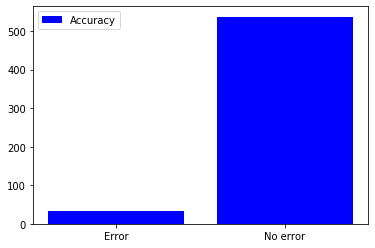

In [231]:
#load_csv("/anaconda3/lib/python3.6/site-packages/sklearn/datasets/data/breast_cancer.csv")

#X_train: matriz con rows con datos e y_train: matriz con resultados que debiese entregar predict
X_train, y_train = load_breast_cancer(return_X_y = True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

N = len(X_train) #number of columns or number of elements by row.
X_train = np.c_[X_train, np.ones(N)] #add columns of 1's if you want
d = len(X_train[0]) #number of rows

#learning rate a elección
l_rate = 0.1
#numero de pasadas que pide enunciado
n_pasada = 1

#imprime cantidad errores mientras entrena
#weights = list()
LISTAX = perceptron(X_train,y_train, l_rate, n_pasada)
weights = LISTAX[0]

cont2 = 0
sum_numero = 0
#veces en que se equivoca con pesos entrenados
for row in X_train:
    prediction = predict(row,weights)
    numero = y_train[cont2] - prediction
    cont2 += 1
    sum_numero += numero**2
print(sum_numero)



    
#plt.bar([1,3,5,7,9],[5,2,7,8,2], label=”Example one”)

plt.bar(["Error", "No error"],[LISTAX[1], len(y_train) - LISTAX[1]], label= "Accuracy", color= "b")
plt.legend()
#plt.xlabel("err")
plt.show()

In [232]:
def multvect(vector1, vector2):
    return np.dot(vector1, vector2)

def multimultvect(alpha, activeset, row):
    sumatotal = 0
    for i in range(len(alpha) - 1):
        res = alpha[i] * multvect(activeset[i], row)
        sumatotal += res
    return sumatotal

def listporesc(lista, escalar):
    for i in range(len(lista)):
        lista[i] = escalar*lista[i]
    return lista


def forgetron(dataset, output, K):
    alpha = [] #lista de valores para cada elemento de activeset
    activeset = [] #se agrega cada row que esta mal clasificado
    activeset.append(dataset[0])
    if (output[0] == 0):
        alpha.append(-1)
    else:
        alpha.append(output[0]) #output[0] = 1
    
    cont3 = 1
    for row in dataset[1:]:
        #print(len(activeset), len(alpha))
        pred = multimultvect(alpha, activeset, row)
        if (output[cont3] == 0):
            total = pred*(-1)
        else:
            total = pred*output[cont3]        
    
        if (total <= 0):
            if len(activeset) < K:
                activeset.append(row)
                alpha = listporesc(alpha, 0.7)
                if (output[cont3] == 0):
                    alpha.append(-1)
                else:
                    alpha.append(output[cont3])
            else:
                activeset.pop(0)
                alpha.pop(0)
                activeset.append(row)
                alpha = listporesc(alpha, 0.7)
                if (output[cont3] == 0):
                    alpha.append(-1)
                    
                else:
                    alpha.append(output[cont3])
                 
        cont3 += 1
    
    return alpha



> e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.

In [233]:
forgetron(X_train, y_train, 10)

[0.04035360699999998,
 -0.05764800999999997,
 0.08235429999999996,
 -0.11764899999999995,
 -0.16806999999999994,
 0.24009999999999992,
 0.3429999999999999,
 0.48999999999999994,
 -0.7,
 -1]

### ¿Qué sucede al variar la función objetivo del problema? 
Si utilizáramos la función de pérdida *binary cross entropy*, que castiga de manera suave los valores en que se equivoca el modelo a través de que el valor de salida sea una confiabilidad $g(x; w,b) \in [0,1]$.
$$
\ell (y, \ g(x;w,b)) = - y \cdot \log{(g(x;w,b))} - (1-y) \cdot \log{(1-g(x;w,b))}
$$

Realice una modificación al perceptrón para que entregue como salida una confiabilidad continua entre 0 y 1. Una buena aproximación de la función *treshold* (con $\theta=0$) del perceptrón es la función sigmoidal.

<img src="https://i.imgur.com/lr6F3Ur.png" width="60%"  />

Ésto sería modelar el perceptrón como:
$$
g(x^{(i)};w,b) = p(y=1|x^{(i)}) = \sigma \left( \sum_j w_j \cdot x^{(i)}_j +b \right)
$$

Con $\sigma$ la función sigmoidal de la forma $\sigma(\xi) = 1/(1+e^{-\xi}) $, la cual tiene una derivada cíclica que hace más fácil el cálculo: $\sigma'(\xi) = \sigma(\xi) (1-\sigma(\xi))$

> f) Escriba una función que compute la función sigmoidal para una entrada $\xi$ cualquiera. *Tenga cuidado con los límites de números que puede trabajar python (por ejemplo $\exp{800}\rightarrow +\infty$)*. *Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar*. Además escriba una función que calcule la salida del nuevo modelo $g(x; w,b)$ con esta función sigmoidal.


In [234]:
def sigmoidal(exp):
    if exp >= 710:
        exp = 709
    elif exp <= -746:
        exp = -745
    
    return (1 / (1 + math.exp(-exp)))

def g(equis, doblev):
    return sigmoidal(multvect(equis,doblev))



> g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato $x^{(i)}$, utilizando $g(x^{(i)};w,b)$. *Tenga cuidado con los límites del logaritmo (recordad que $\log{0}\rightarrow +\infty$)*.

In [235]:
#−𝑦⋅log(𝑔(𝑥;𝑤,𝑏))−(1−𝑦)⋅log(1−𝑔(𝑥;𝑤,𝑏))
def funcion(X_train,weigths,index):
    return(g(X_train[index],weigths))

funcion(X_train,weights,2)

9.328310311951279e-05

> h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo $w$. *Se recomienda derivarla analíticamente y luego escribirla*. *Recuerde el uso de la regla de la cadena*.

Después de los correspondientes despejes se llegó a la expresión:

$$ \nabla_{\vec{w}^{(t)}}\ell = (- \cfrac{Y\cdot\sigma( \sum_j w_j \cdot x^{(i)}_j)\cdot(1-\sigma( \sum_j w_j \cdot x^{(i)}_j))}{\sigma( \sum_j w_j \cdot x^{(i)}_j)} + \cfrac{(1-Y)\cdot\sigma( \sum_j w_j \cdot x^{(i)}_j)\cdot(1-\sigma( \sum_j w_j \cdot x^{(i)}_j))}{(1-\sigma( \sum_j w_j \cdot x^{(i)}_j))})\cdot \vec{X} $$

    
$$ Gradiente = (g - y)\vec{X} $$
    
    


In [236]:
def gradiente(x_train,y_train,weights,index):
    numero = g(x_train[index],weights) - y_train[index]
    return listporesc(x_train[index],numero)

> i) Realice una modificación al algoritmo implementado en b) (**Perceptrón**) para que se adapte a la función objetivo *binary cross entropy* implementada, para ésto haga uso del algoritmo de optimización SGD [[4]](#refs) (*Stochastic Gradient Descend*) con tasa de aprendizaje $\eta \in [0,1]$.

$$ \vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell $$

In [237]:
def perceptron2(datos, output, l_rate, n_pasada):
    weights1 = [0.0 for i in range(len(datos[0]))]
    listaret = list()
    for pasada in range(n_pasada):
        sum_error = 0.0
        cont = 0
        for row in datos:
            grad = gradiente(datos,output,weights1,cont)
            for i in range(len(row)):
                #funcion del perceptron que entrena a los datos
                weights1[i] = weights1[i] - l_rate*grad[i] #solo cambia si output[cont] y prediction no coinciden
            NUMEROX = g(row,weights1)
            cont += 1
            listaret.append(NUMEROX)
    return weights1, listaret


> j) Vuelva a realizar el item c) con esta modificación, además grafique la función de pérdida en el transcurso del entrenamiento. Compare los resultados.

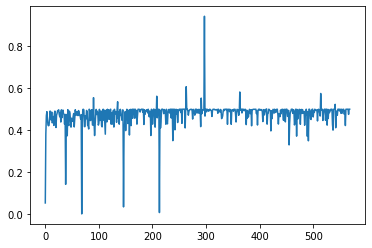

In [238]:
pesos, a = perceptron2(X_train,y_train, l_rate, n_pasada)
pesos
#sorted(a)
plt.plot(a)

<a id="refs"></a>
### Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] STEPHEN, I. (1990). *Perceptron-based learning algorithms*. IEEE Transactions on neural networks, 50(2), 179.  
[3] Dekel, O., Shalev-Shwartz, S., & Singer, Y. (2006). *The Forgetron: A kernel-based perceptron on a fixed budget*. In Advances in neural information processing systems (pp. 259-266).  
[4] Ruder, S. (2016). *An overview of gradient descent optimization algorithms*. arXiv preprint arXiv:1609.04747.

[5] Para mayor entendimiento de los incisos a) y b), basamos nuestra respuesta con ayuda de: https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/#targetText=In%20machine%20learning%2C%20we%20can,model%20one%20at%20a%20time.